**Instrucciones:**
* La entrega consistirá en el archivo .ipynb siguiendo las instrucciones de este notebook.
* Fecha de vencimiento: 23/01/2025, a las 10:55h
* Para la nota se valorará tanto la consecución de la respuesta adecuada como el estilo y adecuación del código fuente, así como la inclusión de comentarios apropiados.
* **No está permitido compartir los resultados de una actividad** con l@s compañer@s. Hacerlo puede suponer suspender la asignatura y enfrentarse a medidas disciplinarias.
* Utilice 4 algoritmos de clustering que usen tecnicas de agrupamiento diferentes (particionamiento, densidad, jerarquico, probabilistico) y determine la mejor cantidad de grupos. Use metricas intrinsecas para elegir la mejor forma de agrupamiento para estos datos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from google.colab import drive
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score

In [ ]:
drive.mount('/content/drive')
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks/AprendizajeAutomatico/data/"
sys.path.append(BASE_FOLDER)

Mounted at /content/drive


In [ ]:
def medida_R_cuadrado(X, Xyp, cXs):
    centros_dataset = np.mean(X,axis=0)  # Centro del dataset completo
    n_clusters = np.sort(np.unique(Xyp))
    distancia_a_centros_dataset = np.sum((X-centros_dataset)**2)
    distancias_intracluster = np.zeros(n_clusters.size)
    for k in np.arange(n_clusters.size):
        distancias_intracluster[k] = np.sum((X[Xyp==n_clusters[k], :] - cXs[n_clusters[k], :])**2)
    distancia_intracluster = np.sum(distancias_intracluster)
    r_cuadrado = 1 - (distancia_intracluster / distancia_a_centros_dataset)
    return r_cuadrado

In [ ]:
np.random.seed(17) # Fijamos una semilla para asegurar la reproducibilidad de la práctica
data_file_url = BASE_FOLDER+'DataSetA.csv'
D = pd.read_csv(data_file_url,header=0)

In [ ]:
D.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1.0,19,15,0.387755
1,2,1.0,21,15,0.816327
2,3,0.0,20,16,0.051020
3,4,0.0,23,16,0.775510
4,5,0.0,31,17,0.397959


Normalizamos el Spending Score para facilitar los calculos posteriores

In [ ]:
MinMaxScaler = MinMaxScaler()
D[['Spending Score (1-100)']] = MinMaxScaler.fit_transform(D[['Spending Score (1-100)']])

Transformamos la columna Gender a dato numerico





In [ ]:
# Convertir la columna 'Genero' a valores numéricos usando OrdinalEncoder
encoder = OrdinalEncoder()
D['Gender'] = encoder.fit_transform(D[['Gender']])

# Imprimir los primeros registros para verificar el cambio
print(D.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1     1.0   19                  15                0.387755
1           2     1.0   21                  15                0.816327
2           3     0.0   20                  16                0.051020
3           4     0.0   23                  16                0.775510
4           5     0.0   31                  17                0.397959


## Agrupamiento por particiones

Kmeans

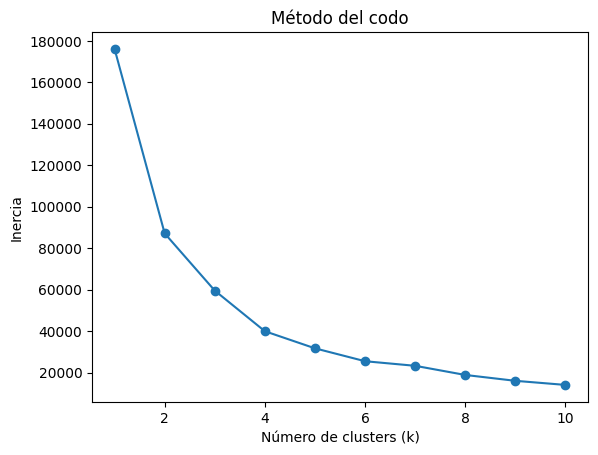

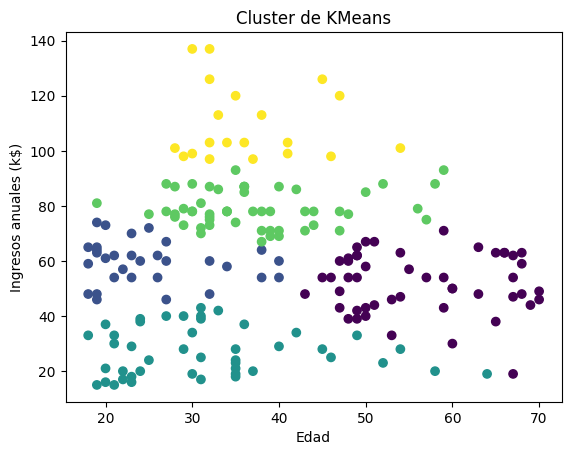

Coeficiente de silueta para Kmeans: -0.017600394781271136
Calinski-Harabasz para Kmeans: 6.09471389256881
Medida R cuadrado: 0.820087816601489


In [ ]:
# Método del codo para determinar el k óptimo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(D[['Age', 'Annual Income (k$)']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.show()


k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=0)
D['cluster_kmeans'] = kmeans.fit_predict(D[['Age', 'Annual Income (k$)']])

# Visualización del cluster de kmeans
plt.scatter(D['Age'], D['Annual Income (k$)'], c=D['cluster_kmeans'], cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Ingresos anuales (k$)')
plt.title('Cluster de KMeans')
plt.show()

# Calcula el silhouette_score para Kmeans
silhouette = silhouette_score(D, labels)
print(f"Coeficiente de silueta para Kmeans: {silhouette}")

# Calcula el calinski_harabasz_score para Kmeans
calinski_harabasz = calinski_harabasz_score(D, labels)
print(f"Calinski-Harabasz para Kmeans: {calinski_harabasz}")

# Calcular la medida R cuadrado
r_cuadrado = medida_R_cuadrado(D[['Age', 'Annual Income (k$)']].values, D['cluster_kmeans'].values, kmeans.cluster_centers_)
print(f"Medida R cuadrado: {r_cuadrado}")

##Agrupamiento por Densidad

Coeficiente de silueta para DBSCAN: 0.1338068619138576
Calinski-Harabasz para DBSCAN: 17.87922045427926
Medida R cuadrado: -1.824918271998063


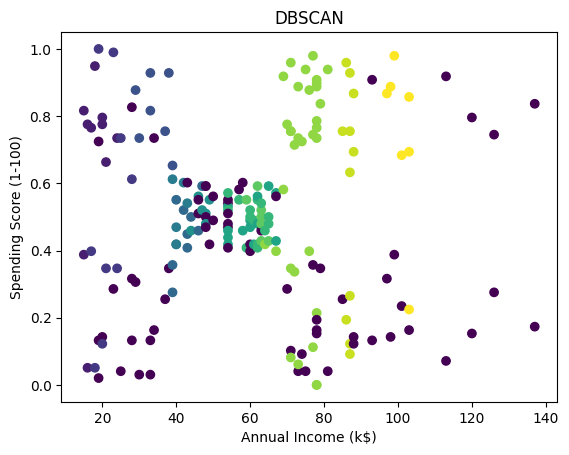

In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5) # Definimos el numero minimo de puntos para ser considerado cluster y la distancia entre ellos
D['cluster'] = dbscan.fit_predict(D[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

X = D[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
labels = D['cluster'].values

# Calcula el silhouette_score para DBSCAN
silhouette = silhouette_score(X, labels)
print(f"Coeficiente de silueta para DBSCAN: {silhouette}")

# Calcula el calinski_harabasz_score para DBSCAN
calinski_harabasz = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz para DBSCAN: {calinski_harabasz}")

# Calcular la medida R cuadrado
r_cuadrado = medida_R_cuadrado(D[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values, D['cluster'].values, dbscan.components_)
print(f"Medida R cuadrado: {r_cuadrado}")
# Visualización
plt.scatter(D['Annual Income (k$)'], D['Spending Score (1-100)'], c=D['cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN')
plt.show()

## Agrupamiento Probabilistico

Coeficiente de silueta para GMM: 0.32649104147129576
Calinski-Harabasz para GMM: 133.00191895656715
R-cuadrado para GMM: 0.573626721762474


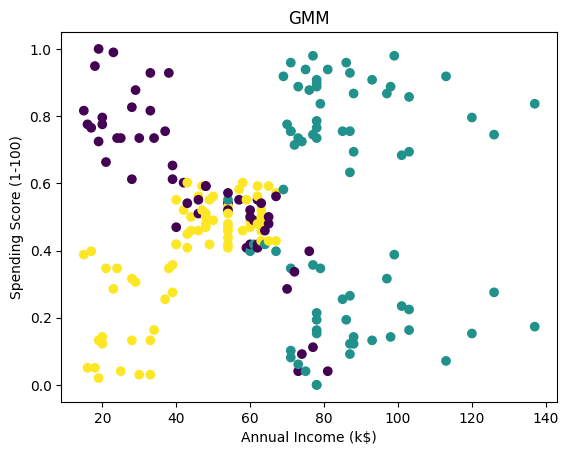

In [ ]:
# ## Agrupamiento Probabilístico (GMM)
X = D[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
gmm = GaussianMixture(n_components=3, random_state=17) # Ejemplo con 3 clusters
D['cluster'] = gmm.fit_predict(X)

labels = D['cluster'].values

# Métricas para GMM
silhouette = silhouette_score(X, labels)
print(f"Coeficiente de silueta para GMM: {silhouette}")

calinski_harabasz = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz para GMM: {calinski_harabasz}")

# R-cuadrado para GMM (ajustado a la función proporcionada)
r_cuadrado = medida_R_cuadrado(X, labels, gmm.means_)
print(f"R-cuadrado para GMM: {r_cuadrado}")

plt.scatter(D['Annual Income (k$)'], D['Spending Score (1-100)'], c=D['cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('GMM')
plt.show()

##Agrupamiento Jerarquico

Coeficiente de silueta para el agrupamiento jerárquico: 0.3349843329753024
Calinski-Harabasz para el agrupamiento jerárquico: 157.08553043757425


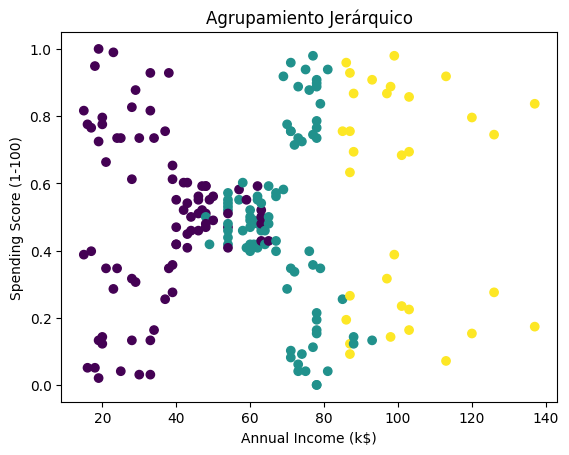

In [ ]:
# Agrupamiento Jerárquico
X = D[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
D['cluster'] = agg_clustering.fit_predict(X)

labels = D['cluster'].values

# Métricas para el agrupamiento jerárquico
silhouette = silhouette_score(X, labels)
print(f"Coeficiente de silueta para el agrupamiento jerárquico: {silhouette}")

calinski_harabasz = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz para el agrupamiento jerárquico: {calinski_harabasz}")

# Visualización
plt.scatter(D['Annual Income (k$)'], D['Spending Score (1-100)'], c=D['cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agrupamiento Jerárquico')
plt.show()

## Conclusiones
Kmeans
1.   Coeficiente de silueta para Kmeans: -0.017600394781271136
2.   Calinski-Harabasz para Kmeans: 6.09471389256881
3.   Medida R cuadrado: 0.820087816601489

DBSCAN
1.   Coeficiente de silueta para DBSCAN: 0.1338068619138576
2.   Calinski-Harabasz para DBSCAN: 17.87922045427926
3.   Medida R cuadrado: -1.824918271998063

Jerarquico Aglomerativo
1.   Coeficiente de silueta para el agrupamiento jerárquico: 0.3349843329753024
2.   Calinski-Harabasz para el agrupamiento jerárquico: 157.08553043757425
  
GMM
1.   Coeficiente de silueta para GMM: 0.32649104147129576
2.   Calinski-Harabasz para GMM: 133.00191895656715
3.  R-cuadrado para GMM: 0.573626721762474


Basandonos en la recopilación de las diferentes metricas podemos observar que el mejor algoritmo de agrupamiento de clustering para nuestro caso es el Jerarquico Aglomerativo, ya que el coeficiente de la silueta nos inidica que un valor cercano a 1 son clusters bien definidos, en este caso tenemos un valor de 0.33 que es el más cercano respecto a los otros algoritmos, y Calinski mide la separación entre los clusters lo que indica que un valor mayor tiene mejor separación de clusters.
